<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Clustering_Part_3_USA_Arrests_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering on USA Arrests dataset 

---
[dataset info](info)


## Objectives

## 1.Libraries

In [57]:
import pandas as pd
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## 2.Data

In [58]:
url = "https://raw.githubusercontent.com/remijul/dataset/master/USArrests.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## 3.Exploratory Data Analysis

### 3.1 Dataset description

Dimension of dataset : (lines , columns)

In [59]:
df.shape

(50, 4)

Names and data type of columns.


In [60]:
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

Dataset information.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Missing data.

In [62]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

### 3.2 Data description

In [63]:
df.describe(include='all')

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### 3.3 Data distribution

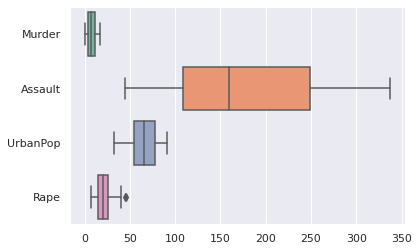

In [64]:
sns.boxplot(data=df, orient="h", palette="Set2")

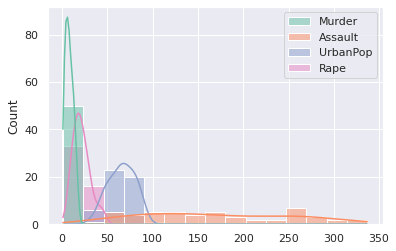

In [65]:
sns.histplot(data=df, palette="Set2", kde=True)

### 3.4 Data correlation

In [66]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


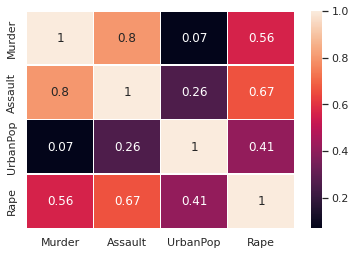

In [67]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

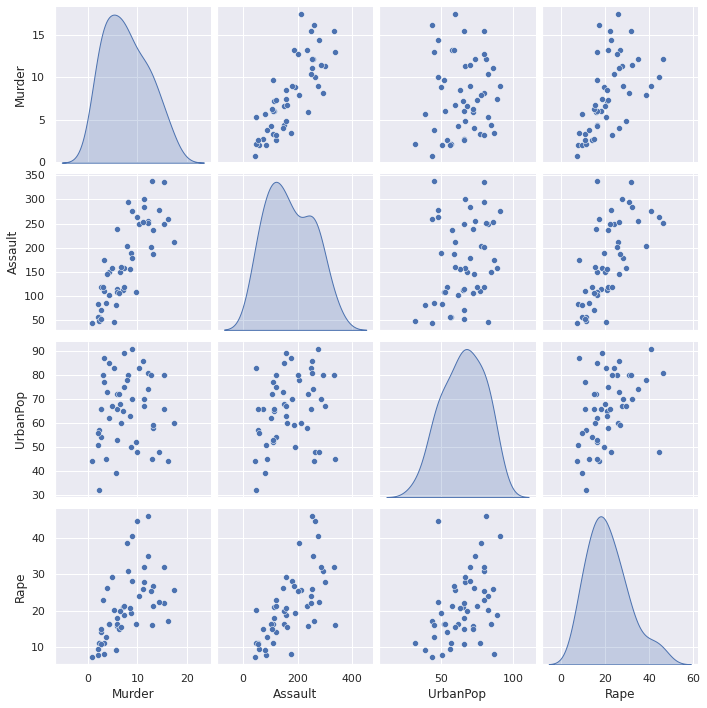

In [68]:
sns.pairplot(data=df, palette="Set2", diag_kind='kde')

## 4.K-means clustering

### 4.1 A basic model

In [69]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [70]:
'''
kmeans = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('model', KMeans(n_clusters=2))]
    )
'''

"\nkmeans = Pipeline(steps=[\n    ('scaler', MinMaxScaler()),\n    ('model', KMeans(n_clusters=2))]\n    )\n"

In [71]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_scaled)

KMeans(n_clusters=2)

In [72]:
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [73]:
kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cluster')

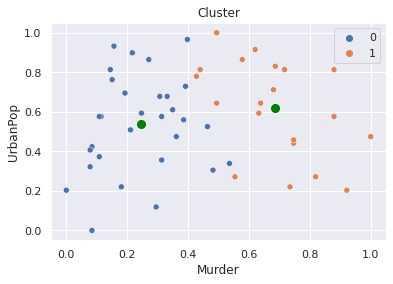

In [74]:
sns.scatterplot(df_scaled[:, 0], df_scaled[:, 2], hue = kmeans.labels_)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], color='green', s=100)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[2])
plt.title("Cluster")

###4.2 Choice of K with the Silhouette method
More info about the Silhouette [Wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering)).  
Silhouette refers to a method of interpretation and validation of consistency within clusters of data.
The technique provides a succinct graphical representation of how well each object has been classified.

In [75]:
silhouette = [] 
K = range(2,10) 

for k in K: 
  #Build / Fit the model 
  model_kmean = KMeans(n_clusters=k).fit(df_scaled) 

  # Labels of clusters
  labels = model_kmean.labels_

  # Store inertia in a list
  silhouette.append(silhouette_score(df_scaled, labels, metric='euclidean')) 

Let's vizualise the silhouette plot...

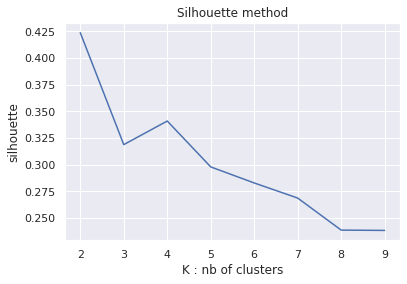

In [76]:
plt.title("Silhouette method")
plt.xlabel("K : nb of clusters")
plt.ylabel("silhouette")
plt.plot(K, silhouette)
plt.show()

The silhouette is clearly shown on the graph, 2 clusters lead to the optimal `s` score.  
BUT, knowledge about data and its context is useful (expecially with unsupervised machine learning) : so 4 clusters could be also a right choice.

## 5.Agglomerative clustering
`Agglomerative Clustering` is the provided class from sklearn for recursively merges pair of clusters of sample data; uses linkage distance.  
See [sklearn Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

###5.1 Compute clustering

In [77]:
hc = AgglomerativeClustering(compute_distances=True).fit(df_scaled)
hc

AgglomerativeClustering(compute_distances=True)

Get the number of clusters found by the algorithm (`n_clusters=2` is the default)

In [78]:
hc.n_clusters_

2

Get the cluster labels for each point.

In [79]:
hc.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

Get the number of leaves in the hierarchical tree.

In [80]:
hc.n_leaves_

50

Get the estimated number of connected components in the graph.

In [81]:
hc.n_connected_components_

1

Get the number of features seen during fit.

In [82]:
hc.n_features_in_

4

Get the names of features seen during fit.

In [83]:
#hc.feature_names_in_

Get the children of each non-leaf node.

In [84]:
hc.children_

array([[14, 28],
       [12, 31],
       [13, 15],
       [22, 48],
       [19, 30],
       [35, 45],
       [36, 46],
       [18, 50],
       [40, 47],
       [25, 26],
       [49, 55],
       [37, 52],
       [ 0, 17],
       [23, 39],
       [34, 61],
       [20, 29],
       [11, 59],
       [33, 44],
       [21, 54],
       [42, 51],
       [ 9, 41],
       [ 6, 38],
       [43, 56],
       [62, 70],
       [ 3, 16],
       [ 4, 27],
       [ 5, 24],
       [53, 57],
       [32, 63],
       [60, 64],
       [ 2, 68],
       [58, 67],
       [65, 71],
       [ 8, 80],
       [66, 77],
       [ 7, 82],
       [10, 72],
       [69, 76],
       [74, 79],
       [75, 83],
       [73, 78],
       [85, 86],
       [87, 89],
       [81, 84],
       [ 1, 92],
       [88, 91],
       [90, 94],
       [93, 95],
       [96, 97]])

And finally, get the distances between nodes in the corresponding place in `children_`.

In [85]:
hc.distances_

array([0.04998623, 0.08718602, 0.10756005, 0.1244755 , 0.13268872,
       0.14457807, 0.14831256, 0.16911103, 0.17864748, 0.18530589,
       0.1878152 , 0.19093789, 0.19646763, 0.19810454, 0.19946072,
       0.2064051 , 0.20964281, 0.24236626, 0.24476699, 0.25732397,
       0.26704783, 0.28642176, 0.28778061, 0.28826119, 0.29643718,
       0.30350213, 0.32298338, 0.32975058, 0.33071893, 0.33261661,
       0.33292919, 0.34970491, 0.38370079, 0.44833287, 0.4619419 ,
       0.48816973, 0.49411173, 0.5425684 , 0.5489781 , 0.6463219 ,
       0.70300102, 0.71401703, 0.71490398, 0.73695949, 0.82400754,
       0.95501923, 1.59125576, 1.77090278, 3.62966353])

###5.2 Plot the dendogram
Dendogram's plot is not a implemented in sklearn.  
Howerver `scipy` offers the possibility to plot dendogram thanks to the `cluster.hierarchy` module.  
See [scipy - cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram) documentation.

In [86]:
import scipy.cluster.hierarchy as shc

First, compute again the linkage matrix (distances).

In [87]:
linkage_matrix = shc.linkage(df_scaled, method='complete')
linkage_matrix

array([[1.40000000e+01, 2.80000000e+01, 4.99862313e-02, 2.00000000e+00],
       [1.20000000e+01, 3.10000000e+01, 8.71860232e-02, 2.00000000e+00],
       [1.30000000e+01, 1.50000000e+01, 1.07560045e-01, 2.00000000e+00],
       [2.20000000e+01, 4.80000000e+01, 1.24475500e-01, 2.00000000e+00],
       [1.90000000e+01, 3.00000000e+01, 1.32688717e-01, 2.00000000e+00],
       [3.50000000e+01, 4.50000000e+01, 1.44578065e-01, 2.00000000e+00],
       [3.60000000e+01, 4.60000000e+01, 1.48312560e-01, 2.00000000e+00],
       [1.80000000e+01, 5.00000000e+01, 1.64643019e-01, 3.00000000e+00],
       [4.00000000e+01, 4.70000000e+01, 1.78647476e-01, 2.00000000e+00],
       [4.90000000e+01, 5.50000000e+01, 1.80637986e-01, 3.00000000e+00],
       [2.50000000e+01, 2.60000000e+01, 1.85305888e-01, 2.00000000e+00],
       [3.40000000e+01, 3.70000000e+01, 1.91633219e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.96467627e-01, 2.00000000e+00],
       [2.30000000e+01, 3.90000000e+01, 1.98104543e

**What kind of interpretation of this matrix ?**

Then, plot the dendogram.

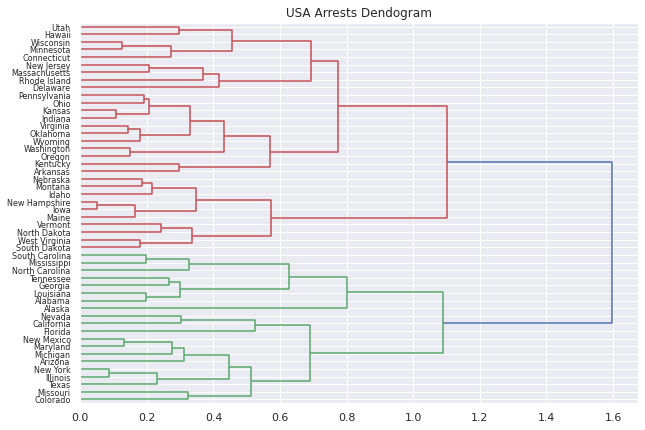

In [88]:
plt.figure(figsize=(10, 7))
plt.title("USA Arrests Dendogram")
dend = shc.dendrogram(linkage_matrix, labels=df.index, orientation='right')

In [89]:
distance

0.6

Let's vizualise the silhouette plot...

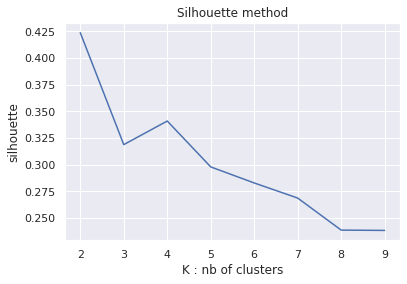

In [90]:
plt.title("Silhouette method")
plt.xlabel("K : nb of clusters")
plt.ylabel("silhouette")
plt.plot(K, silhouette)
plt.show()

The silhouette is clearly shown on the graph, 2 clusters lead to the optimal `s` score.  
BUT, knowledge about data and its context is useful (expecially with unsupervised machine learning) : so 4 clusters could be also a right choice.

## 6.Cluster interpretation
Let's consider the K-means method as the most appropriate, with K=4 as the best choice.

In [91]:
kmeans_4 = KMeans(n_clusters=4).fit(df_scaled)
kmeans_4

KMeans(n_clusters=4)

The labels of our data as the following :

In [92]:
kmeans_4.labels_

array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3,
       0, 1, 3, 0, 0, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

Let's describe some statistics on the differents clusters.

In [93]:
df['cluster'] = kmeans_4.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3


In [94]:
df.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,3.600000,78.538462,52.076923,12.176923
1,13.937500,243.625000,53.750000,21.412500
2,5.656250,138.875000,73.875000,18.781250
3,10.815385,257.384615,76.000000,33.192308


**Cluster interpretation** :
* Cluster 0 : **low** criminality and **low** urban population
* Cluster 1 : **low** criminality and **high** urban population
* Cluster 2 : **high** criminality and **low** urban population
* Cluster 3 : **high** criminality and **high** urban population

##7.Data visualisation with PCA
Let's visualize our data (i.e US States) on 2D plot.  
We are going first to reduce the dataset into 2 principal dimensions, with the PCA' method (Principal Component Analysis).

In [95]:
df_reduced = PCA(n_components=2).fit_transform(df_scaled)
df_reduced

array([[ 0.29308154,  0.27317675],
       [ 0.49729939,  0.22549848],
       [ 0.46030222, -0.20137959],
       [-0.00600344,  0.27569832],
       [ 0.61201638, -0.40998459],
       [ 0.34232314, -0.26810129],
       [-0.36348715, -0.24833813],
       [ 0.04424396, -0.07374598],
       [ 0.80292705, -0.01467209],
       [ 0.44112938,  0.30157847],
       [-0.30290366, -0.37766352],
       [-0.41549962,  0.0656169 ],
       [ 0.36148248, -0.1749245 ],
       [-0.15214187, -0.03441924],
       [-0.59455652, -0.00489204],
       [-0.22060801, -0.05881063],
       [-0.18740047,  0.24339131],
       [ 0.43792654,  0.20613836],
       [-0.60487646,  0.11683089],
       [ 0.48885331,  0.08923308],
       [-0.14532396, -0.35208769],
       [ 0.53345734, -0.06264098],
       [-0.4630113 , -0.14021756],
       [ 0.33429193,  0.58581784],
       [ 0.15975247, -0.0751852 ],
       [-0.30430277,  0.14141152],
       [-0.33959922, -0.03685547],
       [ 0.69252524, -0.23003533],
       [-0.62185514,

KMeans are fitted on the reduced dataset.

In [96]:
kmeans_reduc_4 = KMeans(n_clusters=4).fit(df_reduced)

Let's plot all US States on the 2D representation :
* US States are coloured by their cluster.
* Cluster centroids are added as well.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


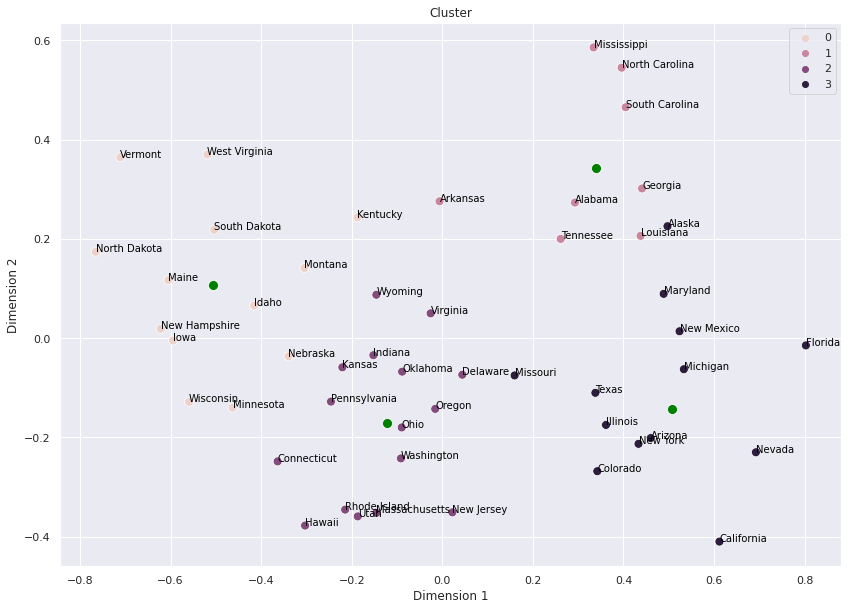

In [97]:
plt.figure(figsize=(14, 10))

sns.scatterplot(df_reduced[:, 0], df_reduced[:, 1], hue = kmeans_4.labels_, s=80)
sns.scatterplot(kmeans_reduc_4.cluster_centers_[:, 0], kmeans_reduc_4.cluster_centers_[:, 1], color='green', s=100)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Cluster")

# add annotations one by one with a loop
for line in range(0, df_reduced.shape[0]):
     plt.text(df_reduced[:, 0][line], df_reduced[:, 1][line], df.index[line], horizontalalignment='left', size='small', color='black')